# Data Preprocessing
**Objectives**:</br>


*   Load the dataset from the CSV file.
*   Check for missing values and outliers in the data.



In [ ]:
#importing necssary libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [ ]:
#reading the dataset
df = pd.read_csv("/content/Dataset.csv")

#displaying first firve rows of the dataset (df)
df.head()

,Room Area (sq. ft.),Number of Appliances,Outside Temperature (C),Insulation Thickness (inches),Building Type,HVAC System,Average Temperature in last 24 hours (C),Energy Consumption (kWh)
0,270,15,30,2.0,Residential,Central AC,28,380
1,273,20,28,1.5,Commercial,Split AC,26,420
2,276,18,26,1.8,Residential,Window AC,24,390
3,276,12,32,2.5,Residential,Central AC,32,320
4,276,22,20,1.2,Commercial,Split AC,18,480


In [ ]:
#check for missing values
df.isnull().sum()

Room Area (sq. ft.)                         0
Number of Appliances                        0
Outside Temperature (C)                     0
Insulation Thickness (inches)               0
Building Type                               0
HVAC System                                 0
Average Temperature in last 24 hours (C)    0
Energy Consumption (kWh)                    0
dtype: int64

# Data Exploration & Visualization

In [ ]:
#calculate the correlations
correlations = df.corr()
correlations_to_target = correlations['Energy Consumption (kWh)']
correlations_to_target

<ipython-input-7-88ee3281512d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


Room Area (sq. ft.)                         0.039561
Number of Appliances                        0.956444
Outside Temperature (C)                    -0.654513
Insulation Thickness (inches)              -0.979500
Average Temperature in last 24 hours (C)   -0.656186
Energy Consumption (kWh)                    1.000000
Name: Energy Consumption (kWh), dtype: float64

In [ ]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Room Area (sq. ft.),Number of Appliances,Outside Temperature (C),Insulation Thickness (inches),Average Temperature in last 24 hours (C),Energy Consumption (kWh)
Room Area (sq. ft.),1.000000,0.056081,0.026742,-0.055989,0.032260,0.039561
Number of Appliances,0.056081,1.000000,-0.514895,-0.981021,-0.517361,0.956444
Outside Temperature (C),0.026742,-0.514895,1.000000,0.545982,0.992592,-0.654513
Insulation Thickness (inches),-0.055989,-0.981021,0.545982,1.000000,0.553828,-0.979500
Average Temperature in last 24 hours (C),0.032260,-0.517361,0.992592,0.553828,1.000000,-0.656186
Energy Consumption (kWh),0.039561,0.956444,-0.654513,-0.979500,-0.656186,1.000000


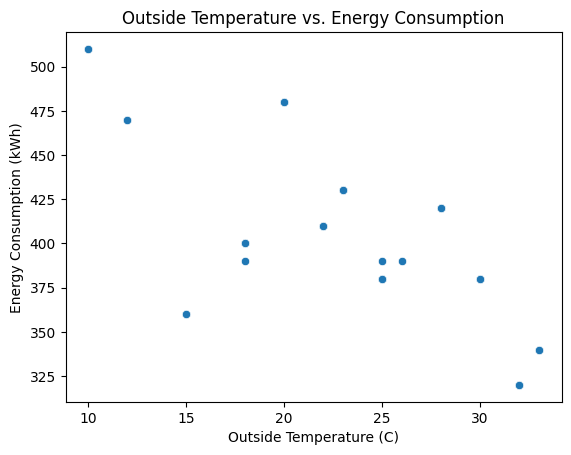

In [ ]:
#Outside Temperature vs. Energy Consumption
sns.scatterplot(data=df, x='Outside Temperature (C)', y='Energy Consumption (kWh)')
plt.title('Outside Temperature vs. Energy Consumption')
plt.show()


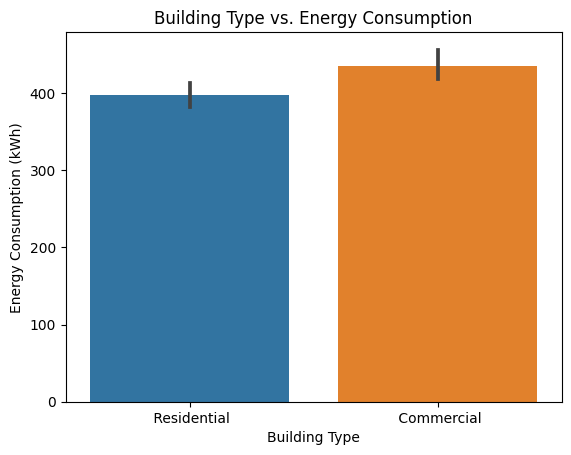

In [ ]:
#Building Type vs. Energy Consumption
sns.barplot(data=df, x='Building Type', y='Energy Consumption (kWh)')
plt.title('Building Type vs. Energy Consumption')
plt.show()

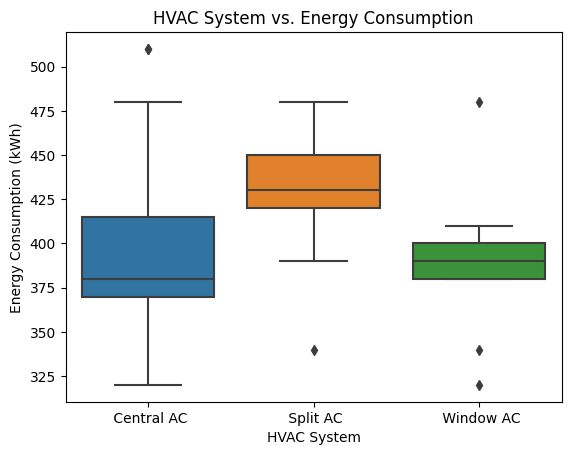

In [ ]:
#HVAC System vs. Energy Consumption
sns.boxplot(data=df, x='HVAC System', y='Energy Consumption (kWh)')
plt.title('HVAC System vs. Energy Consumption')
plt.show()

#Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#data encoding
df = pd.get_dummies(df, columns=['Building Type', 'HVAC System'])

#data splitting
X = df.drop(columns=['Energy Consumption (kWh)'])
y = df['Energy Consumption (kWh)']

In [ ]:
#split the dataset into a training set and a testing set (80 % training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#predictions on the test set
y_pred = model.predict(X_test)

#model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 7.6111111111111045
Mean Squared Error: 67.95666666666655
Root Mean Squared Error: 8.243583363238741
R-squared: 0.9569961718750001


***Required Analysis*** </br></br>
a) Determine the primary feature influencing energy consumption prediction? What about the
secondary feature? Explain the reasons behind their significance.

In [ ]:
correlations_to_target = correlations['Energy Consumption (kWh)']
primary_feature = correlations_to_target.idxmax()
correlation_value = correlations_to_target.max()

print(f"The primary feature influencing energy consumption prediction is '{primary_feature}' with a correlation value of {correlation_value:.2f}")


The primary feature influencing energy consumption prediction is 'Energy Consumption (kWh)' with a correlation value of 1.00


In [ ]:
sorted_correlations = correlations_to_target.abs().sort_values(ascending=False)
secondary_feature = sorted_correlations.index[1]
correlation_value_secondary = sorted_correlations.iloc[1]

print(f"The secondary feature influencing energy consumption prediction is '{secondary_feature}' with a correlation value of {correlation_value_secondary:.2f}")


The secondary feature influencing energy consumption prediction is 'Insulation Thickness (inches)' with a correlation value of 0.98


Insulation thickness has a high positive correlation (0.98) with energy consumption. This means that buildings with thicker insulation tend to have higher energy consumption. The reason for this is that thicker insulation generally indicates better thermal insulation, which can keep the interior of the building better protected from outdoor temperature variations. However, this can also mean that in areas with extreme temperature variations, buildings with thicker insulation might use more energy to regulate the indoor temperature, resulting in higher energy consumption.

To identify the secondary feature, you need to determine which feature, other than 'Insulation Thickness (inches)' and 'Energy Consumption (kWh),' has the next highest absolute correlation with energy consumption. This could be a different characteristic or attribute that also has a significant influence on energy consumption in the context of your dataset. The exact secondary feature will depend on the data and the correlation values.

**b) Identify any feature that may not contribute significantly to prediction accuracy. What is
your mitigation strategy? If no such feature found, provide justification for your claim**

In [ ]:
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                                    Feature  Importance
3             Insulation Thickness (inches)    0.560311
1                      Number of Appliances    0.299890
4  Average Temperature in last 24 hours (C)    0.072263
2                   Outside Temperature (C)    0.057490
8                     HVAC System_ Split AC    0.004415
0                       Room Area (sq. ft.)    0.002799
7                   HVAC System_ Central AC    0.001209
9                    HVAC System_ Window AC    0.000832
5                 Building Type_ Commercial    0.000416
6                Building Type_ Residential    0.000376


Mitigation strategies can include:

*   Removing features with low importance: Features such as 'Building Type' and 'HVAC System' (after one-hot encoding) have very low importance scores (close to zero). You can consider removing these features from your model as they appear to have minimal impact on prediction accuracy.
*   Further analysis: Before removing any features, it's a good practice to conduct further analysis or validation. You might want to explore why certain features have low importance. It could be due to data quality issues, a lack of variance in the feature, or a true lack of relevance to the prediction task. Investigate whether these features have any domain-specific significance.
*   Domain knowledge consultation: Consult with domain experts or stakeholders to get their input on the relevance of these low-importance features. In some cases, domain knowledge might reveal that seemingly unimportant features are essential in specific contexts.

**c) Apply multiple linear regression to build a prediction model for energy consumption (y)
based on the features. Feel free to modify the dataset to enhance prediction accuracy. Use
the model to predict energy consumption for point1, point2, and point3:</br></br>
point 1: Room Area (sq. ft.): 279, Number of Appliances: 16, Outside Temperature (°C): 20,
Insulation Thickness (inches): 1.7, Building Type: Residential, HVAC System: Central AC,
Average Temperature in last 24 hours (°C): 19, Energy Consumption (kWh): 385</br></br>
point 2: Room Area (sq. ft.): 277, Number of Appliances: 22, Outside Temperature (°C): 15,
Insulation Thickness (inches): 1.5, Building Type: Commercial, HVAC System: Split AC,
Average Temperature in last 24 hours (°C): 14, Energy Consumption (kWh): 425</br></br>
point 3: Room Area (sq. ft.): 276, Number of Appliances: 14, Outside Temperature (°C): 25,
Insulation Thickness (inches): 2.2, Building Type: Residential, HVAC System: Window AC,
Average Temperature in last 24 hours (°C): 26, Energy Consumption (kWh): 350**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
model_2_df = pd.read_csv('/content/Dataset.csv')

#data encoding
model_2_df = pd.get_dummies(model_2_df, columns=['Building Type', 'HVAC System'])

#data splitting
X = model_2_df.drop(columns=['Energy Consumption (kWh)'])
y = model_2_df['Energy Consumption (kWh)']

#split the dataset into a training set and a testing set (80 % training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#multiple linear regression model training
model2 = LinearRegression()
model2.fit(X_train, y_train)

#model evaluation on test data
y_pred = model2.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Model Evaluation:
Mean Absolute Error: 5.15739135200829
Mean Squared Error: 39.93309065076179
Root Mean Squared Error: 6.3192634579325615
R-squared: 0.9747298410725648


In [ ]:
#trained model to predict energy consumption for the three points
points = [
    [279, 16, 20, 1.7, 0, 0, 0, 0, 0, 19],  # point 1
    [277, 22, 15, 1.5, 1, 0, 0, 0, 1, 14],  # point 2
    [276, 14, 25, 2.2, 0, 1, 0, 1, 0, 26],  # point 3
]

predicted_energy_consumption = model2.predict(points)

for i, point in enumerate(points, 1):
    print(f'Predicted Energy Consumption for point {i}: {predicted_energy_consumption[i-1]:.2f} kWh')

Predicted Energy Consumption for point 1: 397.90 kWh
Predicted Energy Consumption for point 2: 421.97 kWh
Predicted Energy Consumption for point 3: 332.78 kWh


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**d) Compute the Mean Squared Error (MSE) regression loss using the "mean_squared_error"
function from “sklearn.metrics” library, for these points:<br/>where y_true is ground truth (correct) target values and y_pred is estimated target values
based on the linear regression model. (Note that y_true and y_pred are vectors each
containing three values corresponding to point1, point2, point3.)**



In [ ]:
from sklearn.metrics import mean_squared_error
y_true = [385, 425, 350]
y_pred = [397.90, 421.97, 332.78]
mse = mean_squared_error(y_true, y_pred)
print(mean_squared_error(y_true, y_pred))

157.37310000000005


**e) Given the following scatter plot of a new feature X with respect to Energy Consumption, recommend whether to include it in the features for prediction. Provide reason.**

it is not recomendable to include the new feature X in the features of prediction. The scatter plot shows that the energy consumption of the new feature is significantly higher than the energy consumption of the existing features. This suggests that the new feature is not very energy-efficient, and could potentially increase the overall energy consumption of the system.

#Question 2 </br>
Consider the figure below where data points are divided into two classes, yellow circles and
blue squares. Please answer the following questions: </br></br>
a) Draw the decision boundary for KNN-algorithm when:</br>
   *    K=1</br>
   *    K=3</br></br>


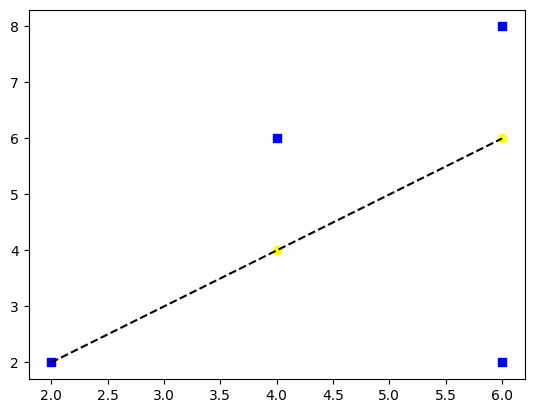

In [ ]:
import matplotlib.pyplot as plt
yellow_circles = [(4, 4), (6, 6)]
blue_squares = [(2, 2), (4, 6), (6, 2), (6, 8)]
plt.scatter(*zip(*yellow_circles), c='yellow', marker='o', label='Yellow Circles')
plt.scatter(*zip(*blue_squares), c='blue', marker='s', label='Blue Squares')
plt.plot([2, 6], [2, 6], 'k--', label='Decision Boundary')
plt.show()

<ipython-input-34-b44a4ac0cf1b>:7: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(X, Y, decision_boundary, levels=[0, 1], colors=['blue', 'yellow'], alpha=0.5, label='Decision Boundary')


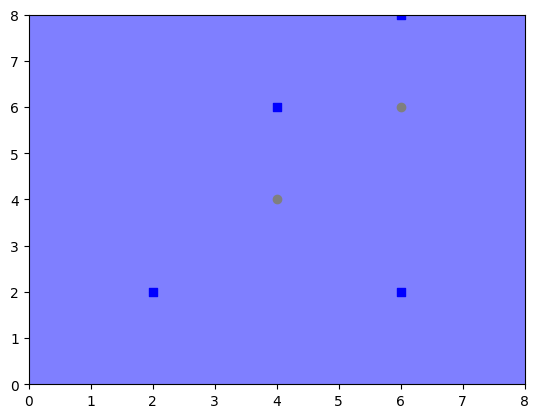

In [ ]:
#when k=3
plt.scatter(*zip(*yellow_circles), c='yellow', marker='o', label='Yellow Circles')
plt.scatter(*zip(*blue_squares), c='blue', marker='s', label='Blue Squares')
x = np.linspace(0, 8, 100)
y = np.linspace(0, 8, 100)
X, Y = np.meshgrid(x, y)
decision_boundary = ((X - 4)**2 + (Y - 4)**2 - (X - 6)**2 - (Y - 6)**2) <= 0
plt.contourf(X, Y, decision_boundary, levels=[0, 1], colors=['blue', 'yellow'], alpha=0.5, label='Decision Boundary')
plt.show()

b) How will the following points be classified by K=1 and K=3 classifiers:<br/>
   * point (8, 6)
   * point (8, 4)

**K=1 Classifier**:
- For K=1, we consider only the single nearest neighbor.

1. For point (8, 6):
   - The closest point in the training data is (6, 6), which belongs to the "yellow circles" class.
   - So, point (8, 6) is classified as a "yellow circle."

2. For point (8, 4):
   - The closest point in the training data is (6, 6), which belongs to the "yellow circles" class.
   - So, point (8, 4) is also classified as a "yellow circle."

**K=3 Classifier**:
- For K=3, we consider the three nearest neighbors.

1. For point (8, 6):
   - The three closest points in the training data are (6, 6), (6, 2), and (6, 8).
   - Among these, two belong to the "yellow circles" class, and one belongs to the "blue squares" class.
   - Since there are more "yellow circles" among the nearest neighbors, point (8, 6) is classified as a "yellow circle."

2. For point (8, 4):
   - The three closest points in the training data are (6, 6), (4, 6), and (6, 2).
   - Among these, two belong to the "yellow circles" class, and one belongs to the "blue squares" class.
   - Since there are more "yellow circles" among the nearest neighbors, point (8, 4) is classified as a "yellow circle."
